In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
print(os.getcwd())
notebook_path = os.path.abspath("test.ipynb")
print(notebook_path)

file = os.path.join(os.getcwd(), "0_trackFiles/0_AUS/track_boundaries.csv")
print(file)

/ws
/ws/test.ipynb
/ws/0_trackFiles/0_AUS/track_boundaries.csv


In [13]:
circuit = pd.read_csv(file, encoding='utf-8')
circuit.head(1)
circuit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47185 entries, 0 to 47184
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       47185 non-null  float64
 1   Y       47185 non-null  float64
 2   Z       47185 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


In [5]:
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2024, 'Australia', 'Q')
session.load(weather=False)
verstappen = session.get_driver('VER')
print(f"Pronto {verstappen['FirstName']}?")

fast_ver = session.laps.pick_drivers('LEC').pick_fastest()
ver_car_data = fast_ver.get_car_data()
t = ver_car_data['Time']
vCar = ver_car_data['Speed']


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching ti

Pronto Max?


In [12]:
#fig, ax = plt.subplots()
#ax.plot(t, vCar, label='Fast')
#ax.set_xlabel('Time')
#ax.set_ylabel('Speed [Km/h]')
#ax.set_title('Verstappen - Vx')
#ax.legend()
#plt.show()

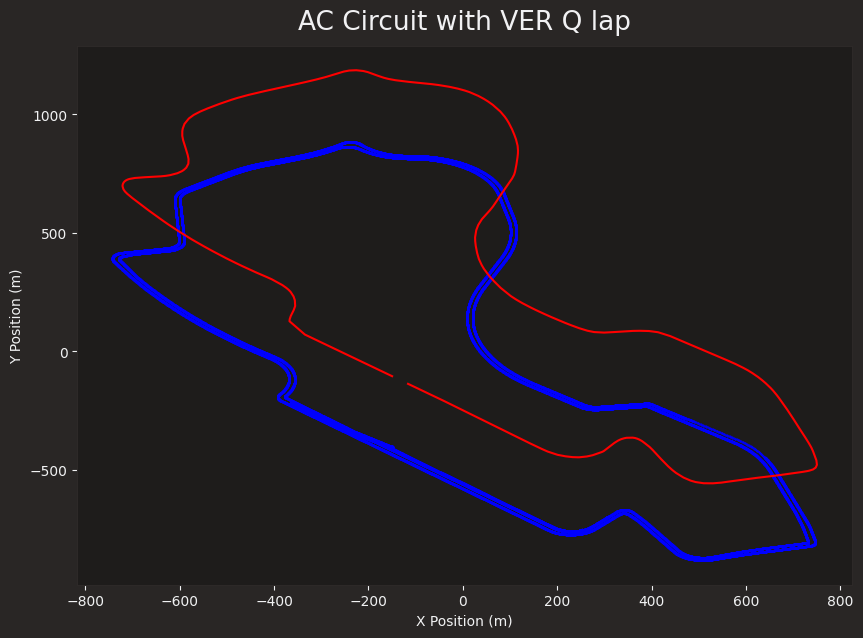

In [19]:
ver_pos_data = fast_ver.get_pos_data()
#x_pos = ver_pos_data["X"]/10 - 3
#y_pos = ver_pos_data["Y"]/10 - 320
x_pos = ver_pos_data["X"]/10
y_pos = ver_pos_data["Y"]/10

# Plot the left and right track edges
plt.figure(figsize=(10, 7))
plt.plot(circuit["X"], circuit["Y"], 'b.', markersize=1)  # Plot points in blue
plt.plot(x_pos, y_pos, 'r')
plt.title("AC Circuit with VER Q lap")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
#plt.axis([-300, 10, -600, -250])
plt.show()

#fig, ax = plt.subplots()
#ax.plot(x_pos, y_pos, label='Fast_Q')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_title('Ver Aus Pos Data')
#ax.legend()
#plt.show()

In [23]:
# Translational Offsets
# Correcting the coordinate axes betweet AC Circuit and FF1 Telemetry data
# *REMEMBER* L & R track data is not in seperate vectors
# Let's find the center of the FF1 data from VER Q lap
center_ff1_x, center_ff1_y = np.mean(x_pos), np.mean(y_pos)
# Let's also find the center of the AC map boundaries
center_ac_x, center_ac_y = np.mean(circuit["X"]), np.mean(circuit["Y"])
# Calculate the offset between the two sources 
offset_x = center_ff1_x - center_ac_x
offset_y = center_ff1_y - center_ac_y
# show me the offset
print(f"Translation Offset: X = {offset_x}, Y = {offset_y}")
x_ac_corrected = circuit["X"] + offset_x
y_ac_corrected = circuit["Y"] + offset_y

Translation Offset: X = 26.18496403984822, Y = 339.90363409571427


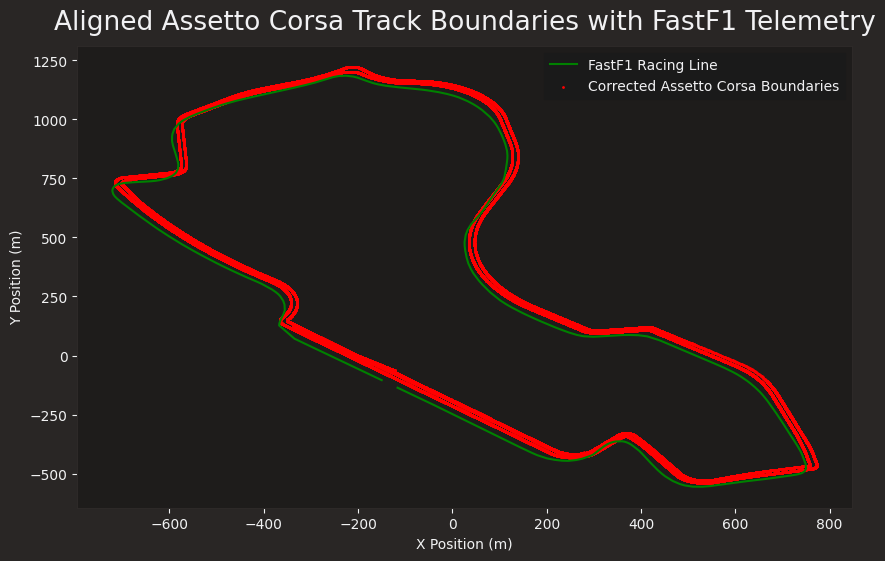

In [27]:
# Plot the corrected Assetto Corsa track vs. FastF1 telemetry
plt.figure(figsize=(10, 6))
plt.plot(x_pos, y_pos, color="green", label="FastF1 Racing Line")
plt.scatter(x_ac_corrected, y_ac_corrected, s=1, color="red", label="Corrected Assetto Corsa Boundaries")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Aligned Assetto Corsa Track Boundaries with FastF1 Telemetry")
plt.legend()
plt.show()

In [35]:
# Rotational Offsets
from scipy.spatial.transform import Rotation as R
# Try and find a segment for comparison 
ff1_vector = [x_pos.iloc[10] - x_pos.iloc[0], y_pos.iloc[10] - y_pos.iloc[0]] 
ac_vector = [x_ac_corrected.iloc[10] - x_ac_corrected.iloc[0], y_ac_corrected[10] - y_ac_corrected.iloc[0]]

# Get the angular delta
angle_ff1 = np.arctan2(ff1_vector[1], ff1_vector[0])
angle_ac = np.arctan2(ac_vector[1], ac_vector[0])
angle_diff = np.degrees(angle_ff1 - angle_ac)
print(f"Rotation Angle Difference: {angle_diff} degrees")
#Convert this angle to rads
angle_rad = np.radians(angle_diff)

Rotation Angle Difference: 114.34040603300575 degrees


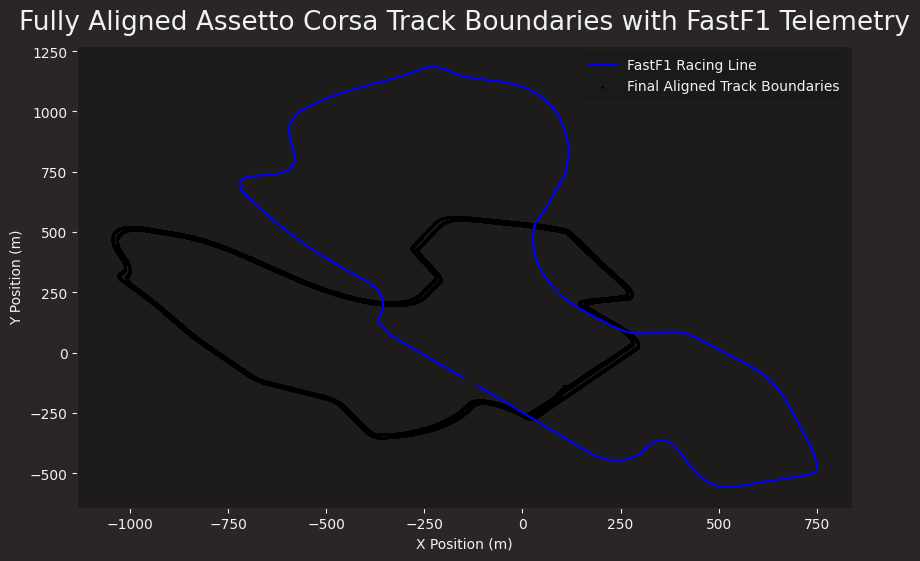

In [39]:
# Apply Angular Transformation 
x_ac_final = np.cos(angle_rad) * x_ac_corrected - np.sin(angle_rad) * y_ac_corrected
y_ac_final = np.sin(angle_rad) * x_ac_corrected - np.cos(angle_rad) * y_ac_corrected

# Plot the final corrected track boundaries
plt.figure(figsize=(10, 6))
plt.plot(x_pos, y_pos, color="blue", label="FastF1 Racing Line")
plt.scatter(x_ac_final, y_ac_final, s=1, color="black", label="Final Aligned Track Boundaries")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Fully Aligned Assetto Corsa Track Boundaries with FastF1 Telemetry")
plt.legend()
plt.show()

In [40]:
# LET'S GET THE UPDATED TRACK DATA FOR L & R BOUNDARIES AND TRY AGAIN!